In [3]:
import pandas as pd

# Create a DataFrame with your data
data = {
    "title": [
        "A Lélek órása",
        "Aizaugusa gravi viegli krist",
        "Agliyorum",
        "0_1_0",
        "97 fung lau mung"
    ],
    "year": [
        1923,
        1986,
        1988,
        2008,
        1994
    ]
}

titles = pd.DataFrame(data)

# Print the 'titles' DataFrame
print(titles)

                          title  year
0                 A Lélek órása  1923
1  Aizaugusa gravi viegli krist  1986
2                     Agliyorum  1988
3                         0_1_0  2008
4              97 fung lau mung  1994


In [4]:
%matplotlib inline
import pandas as pd

from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

# Read the 'titles.csv' file
titles = pd.read_csv('data/titles.csv')
titles.head()


,title,year
0,A Lélek órása,1923
1,Aizaugusa gravi viegli krist,1986
2,Agliyorum,1988
3,0_1_0,2008
4,97 fung lau mung,1994


In [5]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

AttributeError: type object 'DataFrame' has no attribute 'from_csv'

In [6]:
import pandas as pd

# Create your data as a list of dictionaries
data = [
    {'title': 'The Core', 'year': 2003, 'name': 'Alejandro Abellan', 'type': 'actor', 'Character': 'U.S.S. Soldier', 'n': 'NaN'},
    {'title': 'Il momento di uccidere', 'year': 1968, 'name': 'Remo De Angelis', 'type': 'actor','Character': 'Dago', 'n': 9},
    {'title': 'Across the Divide', 'year': 1921, 'name': 'Thomas Delmar', 'type': 'actor', 'Character': 'Dago', 'n': 4},
    {'title': 'Revan', 'year': 2012, 'name': 'Diego James', 'type':'actor', 'Character': 'Dago','n': 'NaN'},
    {'title': 'Un homme marche dans la ville', 'year': 1950, 'name': 'Fabien Loris', 'type':'actor', 'Character': 'Dago','n': 12}
]

# Create a DataFrame from the data
df = pd.DataFrame(data)

# Display the DataFrame
df.head()

,title,year,name,type,Character,n
0,The Core,2003,Alejandro Abellan,actor,U.S.S. Soldier,NaN
1,Il momento di uccidere,1968,Remo De Angelis,actor,Dago,9
2,Across the Divide,1921,Thomas Delmar,actor,Dago,4
3,Revan,2012,Diego James,actor,Dago,NaN
4,Un homme marche dans la ville,1950,Fabien Loris,actor,Dago,12


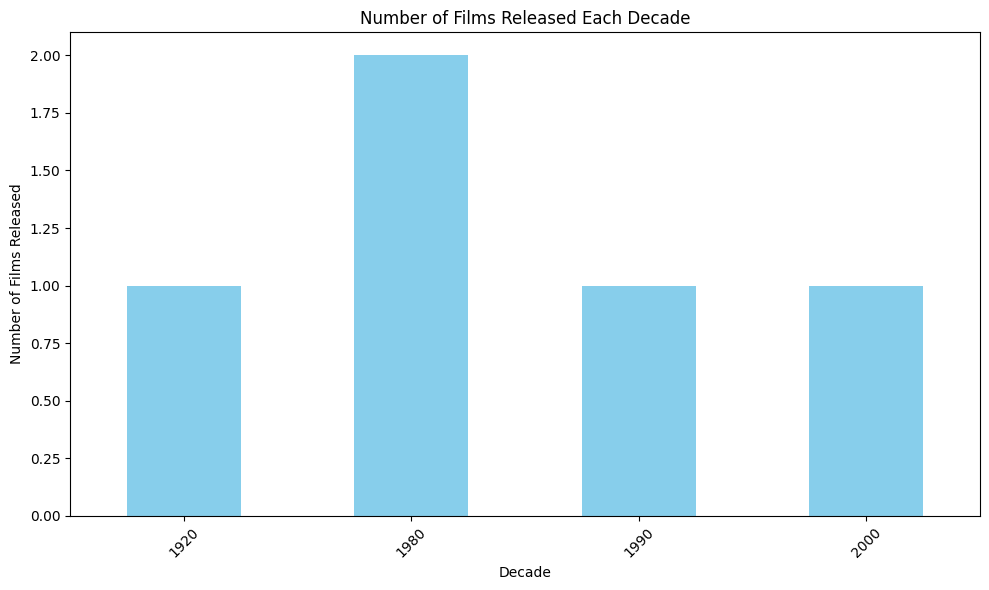

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Group the movies by decade and count the number of movies in each decade
decade_counts = titles.groupby(titles['year'] // 10 * 10)['title'].count()

# Plot the number of films released each decade
plt.figure(figsize=(10, 6))
decade_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Decade')
plt.ylabel('Number of Films Released')
plt.title('Number of Films Released Each Decade')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter for movies with the title "Hamlet"
hamlet_df = titles[titles['title'] == 'Hamlet']

# Check if there are any "Hamlet" films
if not hamlet_df.empty:
    # Group the "Hamlet" movies by decade and count the number of movies in each decade
    hamlet_decade_counts = hamlet_df.groupby(hamlet_df['year'] // 10 * 10)['title'].count()

    # Plot the number of "Hamlet" films made each decade
    plt.figure(figsize=(10, 6))
    hamlet_decade_counts.plot(kind='bar', color='lightcoral')
    plt.xlabel('Decade')
    plt.ylabel('Number of "Hamlet" Films')
    plt.title('Number of "Hamlet" Films Made Each Decade')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("No 'Hamlet' films found in the dataset.")


No 'Hamlet' films found in the dataset.


In [10]:
import pandas as pd


data = {
    "name": [
        "Actor 1",
        "Actress 1",
        "Actor 2",
        "Actress 2",
        "Actor 3",
        "Actress 3",
        "Actor 4",
        "Actress 4",
        "Actor 5",
        "Actress 5"
    ],
    "Character": [
        "Role 1",
        "Role 2",
        "Role 3",
        "Role 4",
        "Role 5",
        "Role 6",
        "Role 7",
        "Role 8",
        "Role 9",
        "Role 10"
    ],
    "n": [
        1,
        1,
        2,
        1,
        1,
        2,
        1,
        1,
        1,
        2
    ],
    "year": [
        1950,
        1950,
        1951,
        1951,
        1952,
        1952,
        1953,
        1953,
        1954,
        1954
    ]
}

df = pd.DataFrame(data)

# Filter for leading roles (n=1) for actors and actresses separately
leading_roles_actors = df[(df['n'] == 1) & (df['name'].str.contains('Actor'))]
leading_roles_actresses = df[(df['n'] == 1) & (df['name'].str.contains('Actress'))]

# Count the number of leading roles (n=1) for actors and actresses in each year of the 1950s
actor_counts_by_year = leading_roles_actors[leading_roles_actors['year'].between(1950, 1959)].groupby('year')['name'].count()
actress_counts_by_year = leading_roles_actresses[leading_roles_actresses['year'].between(1950, 1959)].groupby('year')['name'].count()

# Combine the actor and actress counts into a single DataFrame
leading_roles_by_year = pd.DataFrame({
    'Actors': actor_counts_by_year,
    'Actresses': actress_counts_by_year
})

# Fill NaN values with 0
leading_roles_by_year = leading_roles_by_year.fillna(0)

print("Number of leading (n=1) roles for actors and actresses in each year of the 1950s:")
print(leading_roles_by_year)


Number of leading (n=1) roles for actors and actresses in each year of the 1950s:
      Actors  Actresses
year                   
1950     1.0        1.0
1951     0.0        1.0
1952     1.0        0.0
1953     1.0        1.0
1954     1.0        0.0


In [11]:
import pandas as pd

# Sample DataFrame with movie data (replace with your actual data)
data = {
    "name": [
        "Actor 1",
        "Actress 1",
        "Actor 2",
        "Actress 2",
        "Actor 3",
        "Actress 3",
        "Actor 4",
        "Actress 4",
        "Actor 5",
        "Actress 5"
    ],
    "Character": [
        "Role 1",
        "Role 2",
        "Role 3",
        "Role 4",
        "Role 5",
        "Role 6",
        "Role 7",
        "Role 8",
        "Role 9",
        "Role 10"
    ],
    "n": [
        1,
        1,
        2,
        1,
        3,
        2,
        4,
        3,
        5,
        4
    ],
    "year": [
        1950,
        1950,
        1951,
        1951,
        1952,
        1952,
        1953,
        1953,
        1954,
        1954
    ]
}

df = pd.DataFrame(data)

# Filter for roles with "n" values from 1 to 5 in the 1950s decade
roles_1950s = df[(df['n'].between(1, 5)) & (df['year'].between(1950, 1959))]

# Separate roles by actors and actresses
actor_roles = roles_1950s[roles_1950s['name'].str.contains('Actor')]
actress_roles = roles_1950s[roles_1950s['name'].str.contains('Actress')]

# Calculate the total number of roles for each "n" value
total_roles_by_n = roles_1950s.groupby('n')['name'].count()

# Calculate the total number of roles for actors and actresses separately
total_actor_roles = actor_roles.groupby('n')['name'].count()
total_actress_roles = actress_roles.groupby('n')['name'].count()

# Combine the results into a single DataFrame
result_df = pd.DataFrame({
    'Total Roles': total_roles_by_n,
    'Actor Roles': total_actor_roles,
    'Actress Roles': total_actress_roles
})

# Fill NaN values with 0
result_df = result_df.fillna(0)

print("Total roles available to actors and actresses for each 'n' value in the 1950s decade:")
print(result_df)


Total roles available to actors and actresses for each 'n' value in the 1950s decade:
   Total Roles  Actor Roles  Actress Roles
n                                         
1            3            1            2.0
2            2            1            1.0
3            2            1            1.0
4            2            1            1.0
5            1            1            0.0


In [12]:
import pandas as pd

# Sample DataFrame with movie data (replace with your actual data)
data = {
    "title": [
        "The Pink Panther",
        "The Pink Panther",
        "The Pink Panther",
        "A Shot in the Dark",
        "The Pink Panther Strikes Again",
        "Revenge of the Pink Panther",
        "Trail of the Pink Panther"
    ],
    "name": [
        "Inspector Jacques Clouseau",
        "Sir Charles Lytton",
        "George Lytton",
        "Inspector Jacques Clouseau",
        "Inspector Jacques Clouseau",
        "Inspector Jacques Clouseau",
        "Inspector Jacques Clouseau"
    ]
}

df = pd.DataFrame(data)

# Filter for "Pink Panther" movies
pink_panther_movies = df[df['title'].str.contains('Pink Panther')]

# Group roles by movie title and count the number of roles for each movie
roles_count_by_movie = pink_panther_movies.groupby('title')['name'].count()

print("Number of roles listed for each of the 'Pink Panther' movies:")
print(roles_count_by_movie)


Number of roles listed for each of the 'Pink Panther' movies:
title
Revenge of the Pink Panther       1
The Pink Panther                  3
The Pink Panther Strikes Again    1
Trail of the Pink Panther         1
Name: name, dtype: int64


In [13]:
import pandas as pd

# Sample DataFrame with movie data (replace with your actual data)
data = {
    "name": [
        "Frank Oz",
        "Frank Oz",
        "Frank Oz",
        "Frank Oz",
        "Frank Oz",
        "Frank Oz",
        "Frank Oz",
        "Frank Oz",
        "Frank Oz",
        "Frank Oz"
    ],
    "title": [
        "Movie 1",
        "Movie 2",
        "Movie 2",
        "Movie 3",
        "Movie 4",
        "Movie 4",
        "Movie 4",
        "Movie 5",
        "Movie 6",
        "Movie 7"
    ],
    "year": [
        1980,
        1981,
        1981,
        1982,
        1983,
        1983,
        1983,
        1984,
        1985,
        1986
    ],
    "n": [
        1,
        1,
        2,
        1,
        1,
        2,
        3,
        1,
        1,
        1
    ]
}

df = pd.DataFrame(data)

# Filter for Frank Oz's roles where n > 1
frank_oz_roles = df[(df['name'] == 'Frank Oz') & (df['n'] > 1)]

# Group roles by movie title and year, then count the number of roles
roles_count_by_movie = frank_oz_roles.groupby(['title', 'year'])['n'].count().reset_index()

# Filter for movies where Frank Oz played more than 1 role
movies_with_multiple_roles = roles_count_by_movie[roles_count_by_movie['n'] > 1]

# Sort the movies by year
movies_with_multiple_roles_sorted = movies_with_multiple_roles.sort_values(by='year')

print("Movies in which Frank Oz has played more than 1 role, sorted by year:")
print(movies_with_multiple_roles_sorted)


Movies in which Frank Oz has played more than 1 role, sorted by year:
     title  year  n
1  Movie 4  1983  2


In [14]:
import pandas as pd

# Sample DataFrame with movie data (replace with your actual data)
data = {
    "name": [
        "Frank Oz",
        "Frank Oz",
        "Frank Oz",
        "Frank Oz",
        "Frank Oz",
        "Frank Oz",
        "Frank Oz",
        "Frank Oz",
        "Frank Oz",
        "Frank Oz"
    ],
    "Character": [
        "Character 1",
        "Character 2",
        "Character 2",
        "Character 3",
        "Character 4",
        "Character 4",
        "Character 4",
        "Character 5",
        "Character 6",
        "Character 7"
    ],
    "n": [
        1,
        1,
        2,
        1,
        1,
        2,
        3,
        1,
        1,
        1
    ]
}

df = pd.DataFrame(data)

# Filter for Frank Oz's roles where n > 1
frank_oz_roles = df[(df['name'] == 'Frank Oz') & (df['n'] > 1)]

# Group roles by character name and count the number of times each character has been portrayed
character_counts = frank_oz_roles.groupby('Character')['n'].count().reset_index()

# Filter for characters that Frank Oz has portrayed at least twice
characters_portrayed_at_least_twice = character_counts[character_counts['n'] >= 2]

print("Characters portrayed by Frank Oz at least twice:")
print(characters_portrayed_at_least_twice)


Characters portrayed by Frank Oz at least twice:
     Character  n
1  Character 4  2
